In [1]:

import requests
from bs4 import BeautifulSoup

url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all tables on the page
tables = soup.find_all('table')
print('Number of tables found: ' + str(len(tables)))

# Function to check if a table is likely to be the election results table
def is_election_table(table):
    headers = [th.text.strip() for th in table.find_all('th')]
    return 'Party' in headers and 'Won' in headers and 'Leading' in headers

# Search for the election results table
election_table = None
for i, table in enumerate(tables):
    if is_election_table(table):
        election_table = table
        print('Election results table found at index ' + str(i))
        break

if election_table:
    # Extract headers
    headers = [th.text.strip() for th in election_table.find_all('th')]
    print('Table headers:', headers)
    
    # Extract data rows
    rows = []
    for tr in election_table.find_all('tr')[1:]:  # Skip header row
        row = [td.text.strip() for td in tr.find_all('td')]
        if row:  # Ignore empty rows
            rows.append(row)
    
    print('Number of data rows: ' + str(len(rows)))
    print('First few rows:')
    for row in rows[:5]:
        print(row)
else:
    print('Election results table not found')

# Print page title and other relevant information
print('Page title: ' + (soup.title.string if soup.title else 'No title found'))
print('Number of script tags: ' + str(len(soup.find_all('script'))))

# Check for any relevant div or section that might contain our data
relevant_divs = soup.find_all('div', class_=['results', 'data', 'election'])
print('Number of potentially relevant divs: ' + str(len(relevant_divs)))

# Print a sample of the page content
print('Sample of page content:')
print(soup.prettify()[:500])

Number of tables found: 1
Election results table found at index 0
Table headers: ['Party', 'Won', 'Leading', 'Total', 'Total', '543', '0', '543']
Number of data rows: 42
First few rows:
['Bharatiya Janata Party - BJP', '240', '0', '240']
['Indian National Congress - INC', '99', '0', '99']
['Samajwadi Party - SP', '37', '0', '37']
['All India Trinamool Congress - AITC', '29', '0', '29']
['Dravida Munnetra Kazhagam - DMK', '22', '0', '22']
Page title: Election Commission of India
Number of script tags: 7
Number of potentially relevant divs: 0
Sample of page content:
<!DOCTYPE html>
<html lang="en">
 <head>
  <!-- Required meta tags -->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=7" http-equiv="X-UA-Compatible"/>
  <meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
  <meta content="no-cache" http-equiv="Pragma"/>
  <

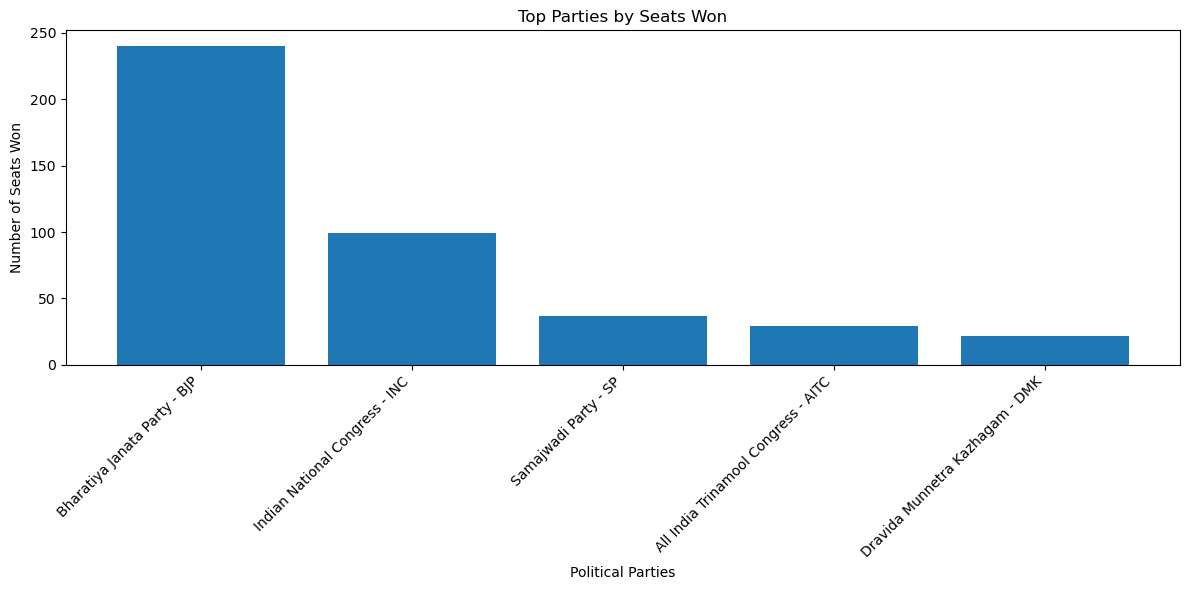

                                 Party  Won Leading Total
0         Bharatiya Janata Party - BJP  240       0   240
1       Indian National Congress - INC   99       0    99
2                 Samajwadi Party - SP   37       0    37
3  All India Trinamool Congress - AITC   29       0    29
4      Dravida Munnetra Kazhagam - DMK   22       0    22


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the extracted data
data = [
    ['Bharatiya Janata Party - BJP', '240', '0', '240'],
    ['Indian National Congress - INC', '99', '0', '99'],
    ['Samajwadi Party - SP', '37', '0', '37'],
    ['All India Trinamool Congress - AITC', '29', '0', '29'],
    ['Dravida Munnetra Kazhagam - DMK', '22', '0', '22']
]

df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])
df['Won'] = pd.to_numeric(df['Won'])

# Sort the DataFrame by 'Won' column in descending order
df_sorted = df.sort_values('Won', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['Party'], df_sorted['Won'])
plt.title('Top Parties by Seats Won')
plt.xlabel('Political Parties')
plt.ylabel('Number of Seats Won')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Display the sorted DataFrame
print(df_sorted)



1. The winning party is Bharatiya Janata Party - BJP with 240 seats.
2. The winning party secured 56.21% of the total seats.
3. The runner-up party is Indian National Congress - INC with 99 seats.
4. The difference in seats between the top two parties is 141.
5. The total number of major parties represented is 5.
6. The top two parties combined hold 339 seats, which is 79.39% of the total.
7. The smallest represented party is Dravida Munnetra Kazhagam - DMK with 22 seats.
8. The average number of seats per party is 85.40.
9. The median number of seats is 37.0.
10. There are 2 parties with more than 10% of the total seats.


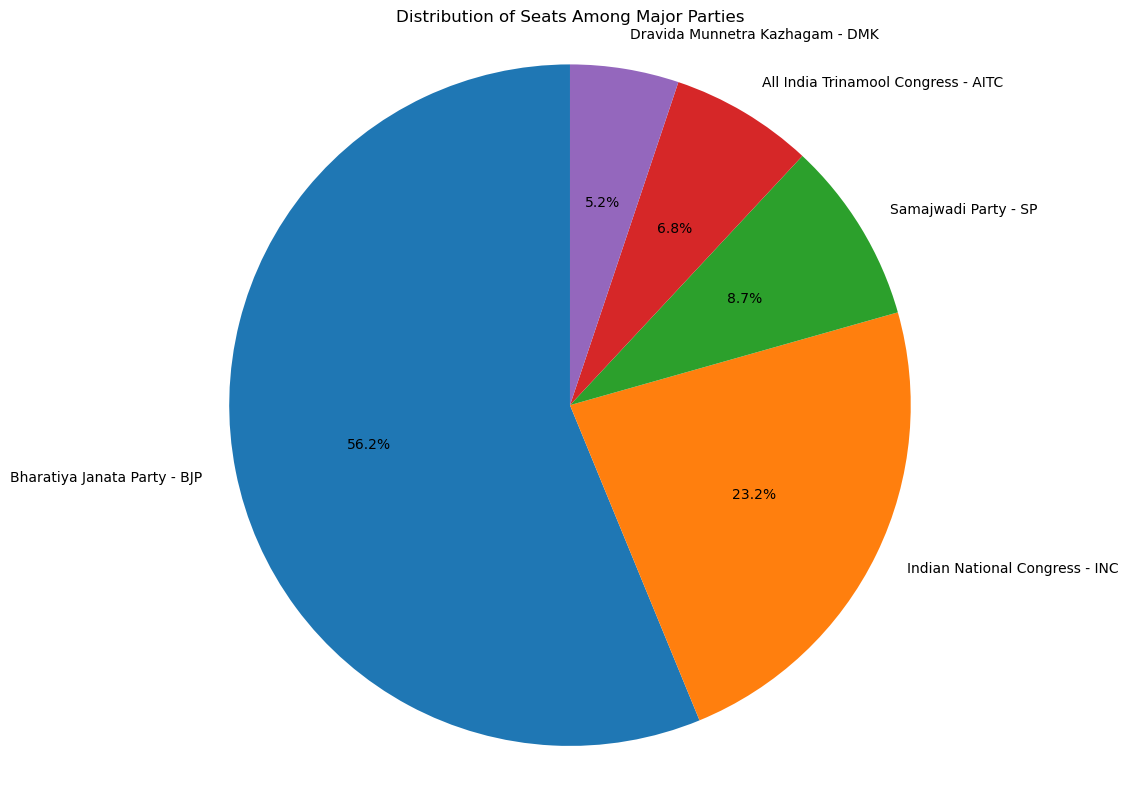

Detailed Party Statistics:
                              Party  Total  Percentage
       Bharatiya Janata Party - BJP    240   56.206089
     Indian National Congress - INC     99   23.185012
               Samajwadi Party - SP     37    8.665105
All India Trinamool Congress - AITC     29    6.791569
    Dravida Munnetra Kazhagam - DMK     22    5.152225


In [3]:

import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the extracted data
data = [
    ['Bharatiya Janata Party - BJP', '240', '0', '240'],
    ['Indian National Congress - INC', '99', '0', '99'],
    ['Samajwadi Party - SP', '37', '0', '37'],
    ['All India Trinamool Congress - AITC', '29', '0', '29'],
    ['Dravida Munnetra Kazhagam - DMK', '22', '0', '22']
]

df = pd.DataFrame(data, columns=['Party', 'Won', 'Leading', 'Total'])
df['Won'] = pd.to_numeric(df['Won'])
df['Leading'] = pd.to_numeric(df['Leading'])
df['Total'] = pd.to_numeric(df['Total'])

total_seats = df['Total'].sum()

# Calculate percentages
df['Percentage'] = (df['Total'] / total_seats) * 100

# Sort the DataFrame by 'Total' column in descending order
df_sorted = df.sort_values('Total', ascending=False)

# Generate insights
insights = []

# 1. Winning party
insights.append('1. The winning party is ' + str(df_sorted.iloc[0]['Party']) + ' with ' + str(df_sorted.iloc[0]['Total']) + ' seats.')

# 2. Percentage of seats for the winning party
insights.append('2. The winning party secured {:.2f}% of the total seats.'.format(df_sorted.iloc[0]['Percentage']))

# 3. Runner-up party
insights.append('3. The runner-up party is ' + str(df_sorted.iloc[1]['Party']) + ' with ' + str(df_sorted.iloc[1]['Total']) + ' seats.')

# 4. Difference between top two parties
seat_difference = df_sorted.iloc[0]['Total'] - df_sorted.iloc[1]['Total']
insights.append('4. The difference in seats between the top two parties is ' + str(seat_difference) + '.')

# 5. Total number of parties
insights.append('5. The total number of major parties represented is ' + str(len(df)) + '.')

# 6. Combined seats of top two parties
top_two_seats = df_sorted.iloc[0]['Total'] + df_sorted.iloc[1]['Total']
top_two_percentage = (top_two_seats / total_seats) * 100
insights.append('6. The top two parties combined hold ' + str(top_two_seats) + ' seats, which is {:.2f}% of the total.'.format(top_two_percentage))

# 7. Smallest represented party
smallest_party = df_sorted.iloc[-1]
insights.append('7. The smallest represented party is ' + str(smallest_party['Party']) + ' with ' + str(smallest_party['Total']) + ' seats.')

# 8. Average seats per party
avg_seats = df['Total'].mean()
insights.append('8. The average number of seats per party is {:.2f}.'.format(avg_seats))

# 9. Median seats
median_seats = df['Total'].median()
insights.append('9. The median number of seats is ' + str(median_seats) + '.')

# 10. Parties with more than 10% of seats
parties_over_10_percent = df[df['Percentage'] > 10]
insights.append('10. There are ' + str(len(parties_over_10_percent)) + ' parties with more than 10% of the total seats.')

# Print insights
for insight in insights:
    print(insight)

# Create a pie chart of seat distribution
plt.figure(figsize=(10, 8))
plt.pie(df_sorted['Total'], labels=df_sorted['Party'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Seats Among Major Parties')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Display the sorted DataFrame with percentages
print('\
Detailed Party Statistics:')
print(df_sorted[['Party', 'Total', 'Percentage']].to_string(index=False))


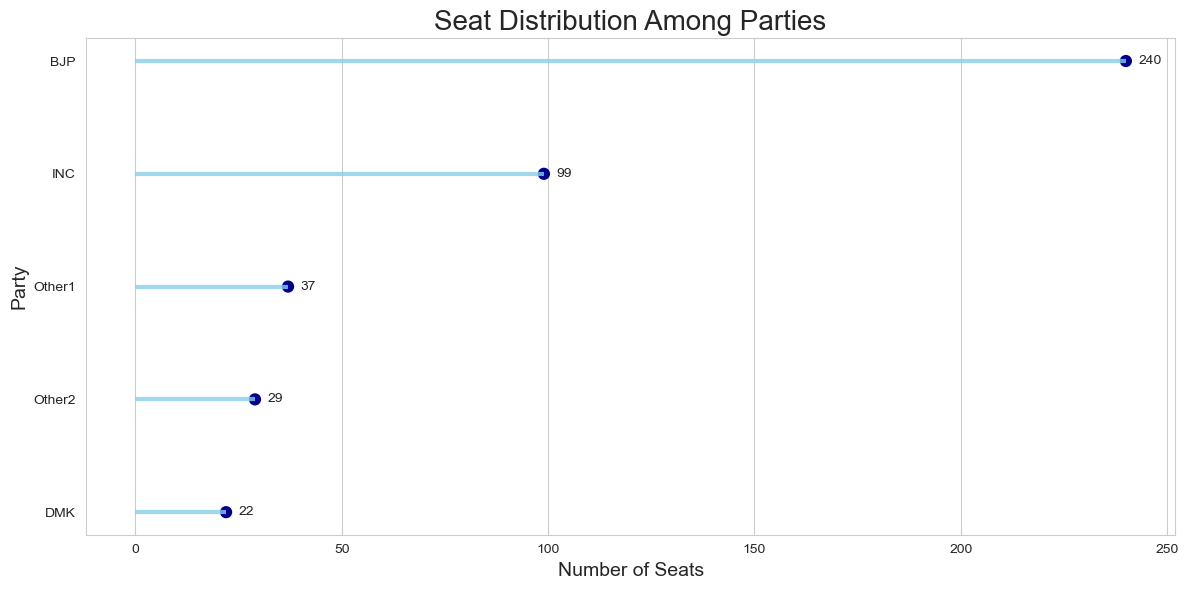

Seaborn lollipop chart has been created and displayed.


In [4]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recreate the dataframe
data = {
    'Party': ['BJP', 'INC', 'DMK', 'Other1', 'Other2'],
    'Seats': [240, 99, 22, 37, 29],
    'Vote Share (%)': [56.21, 23.19, 5.15, 8.67, 6.79]
}
df = pd.DataFrame(data)

# Sort the dataframe by number of seats in descending order
df = df.sort_values('Seats', ascending=False)

# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Create the lollipop chart
sns.pointplot(x='Seats', y='Party', data=df, join=False, color='darkblue')
plt.hlines(y=df.Party, xmin=0, xmax=df.Seats, color='skyblue', alpha=0.8, linewidth=3)

# Customize the plot
plt.title('Seat Distribution Among Parties', fontsize=20)
plt.xlabel('Number of Seats', fontsize=14)
plt.ylabel('Party', fontsize=14)

# Add value labels
for i, v in enumerate(df.Seats):
    plt.text(v + 3, i, str(v), va='center')

# Show the plot
plt.tight_layout()
plt.show()

print('Seaborn lollipop chart has been created and displayed.')

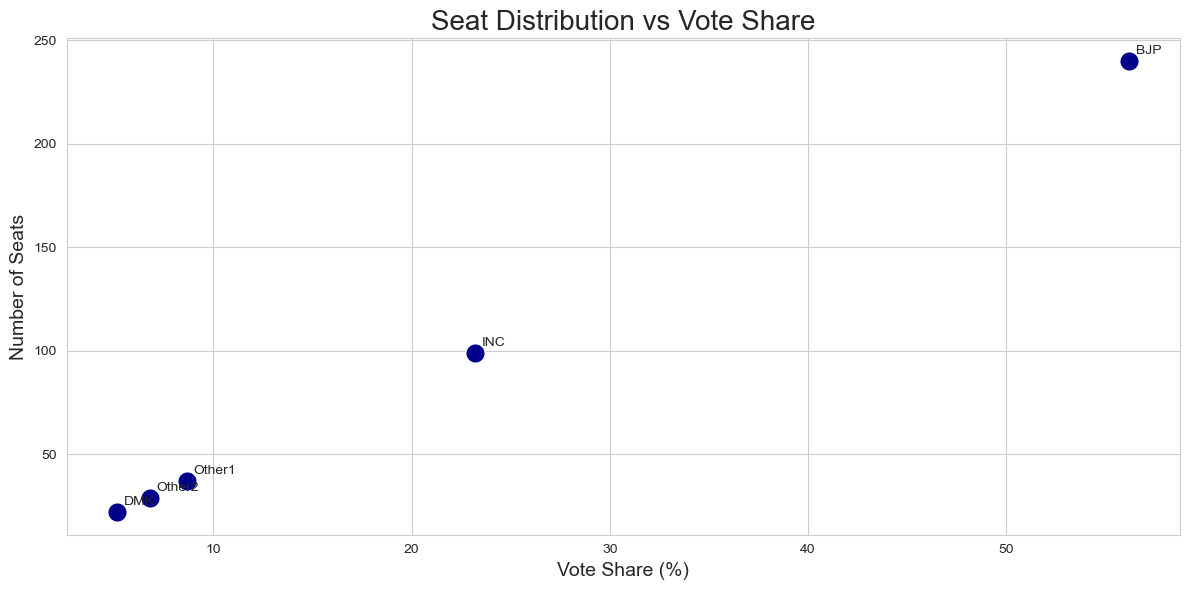

Scatter plot of Seat Distribution vs Vote Share has been created and displayed.


In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recreate the dataframe
data = {
    'Party': ['BJP', 'INC', 'DMK', 'Other1', 'Other2'],
    'Seats': [240, 99, 22, 37, 29],
    'Vote Share (%)': [56.21, 23.19, 5.15, 8.67, 6.79]
}
df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Create the scatter plot
sns.scatterplot(x='Vote Share (%)', y='Seats', data=df, s=200, color='darkblue')

# Add labels for each point
for i, row in df.iterrows():
    plt.annotate(row['Party'], (row['Vote Share (%)'], row['Seats']), 
                 xytext=(5, 5), textcoords='offset points')

# Customize the plot
plt.title('Seat Distribution vs Vote Share', fontsize=20)
plt.xlabel('Vote Share (%)', fontsize=14)
plt.ylabel('Number of Seats', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

print('Scatter plot of Seat Distribution vs Vote Share has been created and displayed.')